In [1]:
"""
Robust Portfolio analysis using Pandas for main analysis & cleaning, np for calculations, mpl & sns for visualization
"""

'\nRobust Portfolio analysis using Pandas for main analysis & cleaning, np for calculations, mpl & sns for visualization\n'

In [2]:
# imports

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [9]:
def gen_df(filename):
    """
    read in a csv given the filename in the correct format
    """
    df = pd.read_csv(f"Resources/{filename}.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
    return df

In [ ]:
# generating dataframes for the main files, doing low level cleaning
files = ["whale_returns", "algo_returns", "sp500_history"]
dfs = [gen_df(file) for file in files]
dfs = [df.dropna() for df in dfs]

In [21]:
# datatype checking: looks like close for sp500 is an object instead of a float
dfs_types = [df.dtypes for df in dfs]
dfs_types

[SOROS FUND MANAGEMENT LLC      float64
 PAULSON & CO.INC.              float64
 TIGER GLOBAL MANAGEMENT LLC    float64
 BERKSHIRE HATHAWAY INC         float64
 dtype: object,
 Algo 1    float64
 Algo 2    float64
 dtype: object,
 Close    object
 dtype: object]

In [22]:
# We see that the problem is the $ in front of otherwise float data
dfs[2]

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [30]:
# remove the $ and then change the datatype to float
dfs[2]["Close"] = dfs[2]["Close"].str.replace("$", "")
dfs[2]["Close"] = dfs[2]["Close"].astype("float")
dfs[2].dtypes

<ipython-input-30-1fd24996e589>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dfs[2]["Close"] = dfs[2]["Close"].str.replace("$", "")


Close    float64
dtype: object

In [ ]:
"""
Below is confirmation of no null values
"""

In [18]:
# whale returns
dfs[0].isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [19]:
# algo returns
dfs[1].isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [20]:
# sp500 close history
dfs[2].isnull().sum()

Close    0
dtype: int64

In [31]:
# convert sp500 closing to returns
dfs[2] = dfs[2].pct_change()

In [32]:
dfs[2].rename(columns={"Close": "SP500"}, inplace=True)

In [33]:
combined_returns = pd.concat([df for df in dfs], axis= "columns", join="inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [60]:
def make_plot(df, plot_type, title):
    if plot_type == "line":
        return df.plot(figsize=(20, 10), title=title)
    elif plot_type == "box":
        return df.plot.box(figsize=(20, 10), title=title)
    elif plot_type == "bar":
        return df.plot(kind="bar",figsize=(20, 10), title=title)
    else:
        return "plot type unavailable"

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

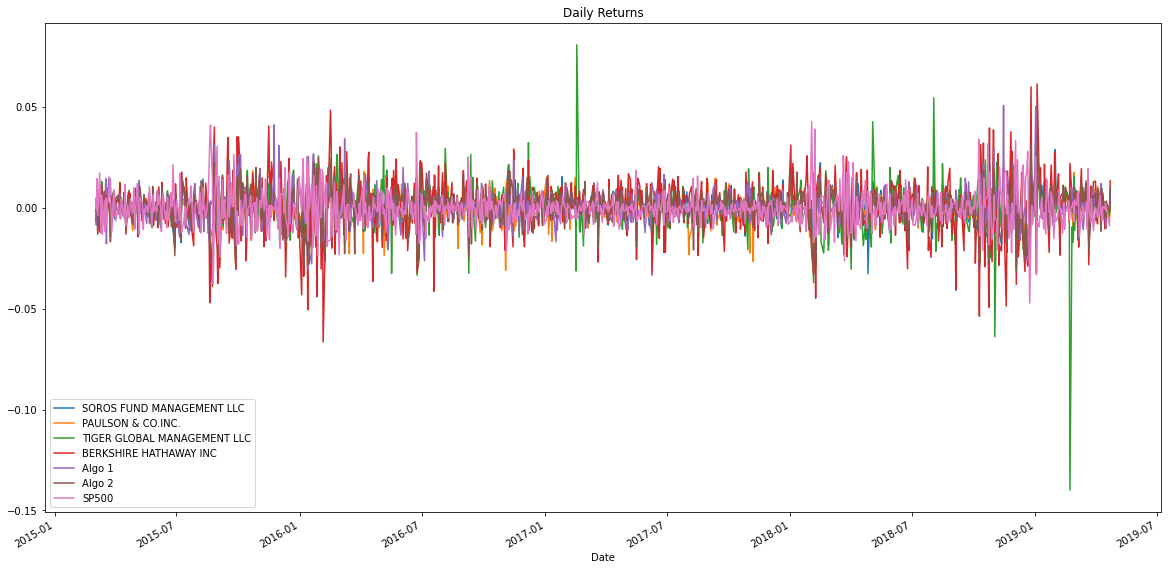

In [47]:
make_plot(combined_returns, "line","Daily Returns")

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

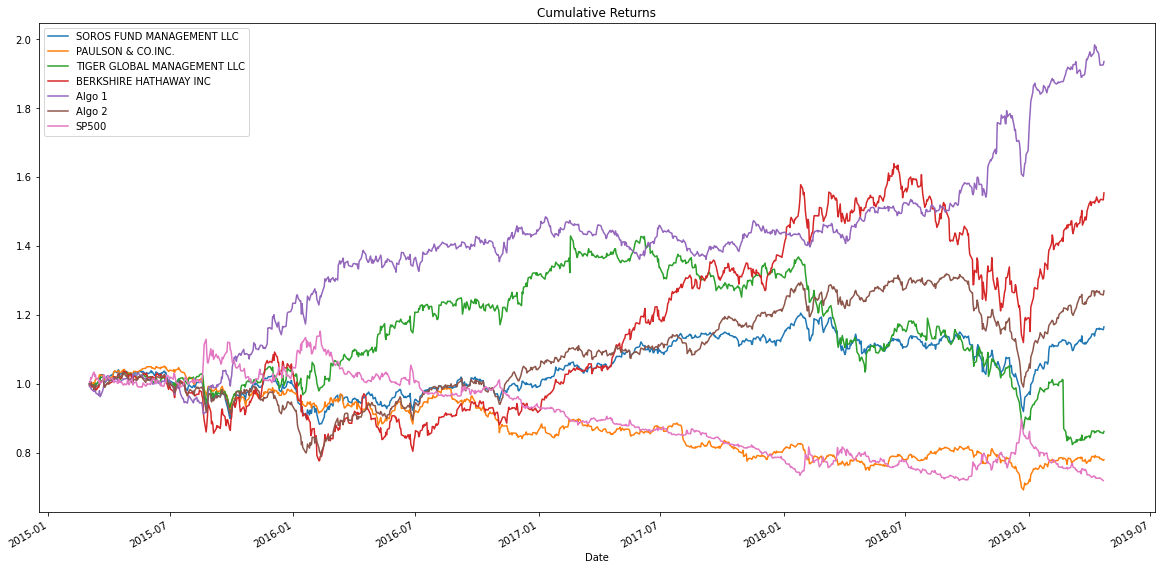

In [48]:
# Cumulative return calculation
cumulative_returns = (1+combined_returns).cumprod()
make_plot(cumulative_returns,"line", "Cumulative Returns")

## Risk Analysis

    1. Box plot per portfolio
    2. Standard deviation for all portfolios
    3. Compare risk to SP500
    4. Annualized standard deviation

<AxesSubplot:title={'center':'Risk Analysis'}>

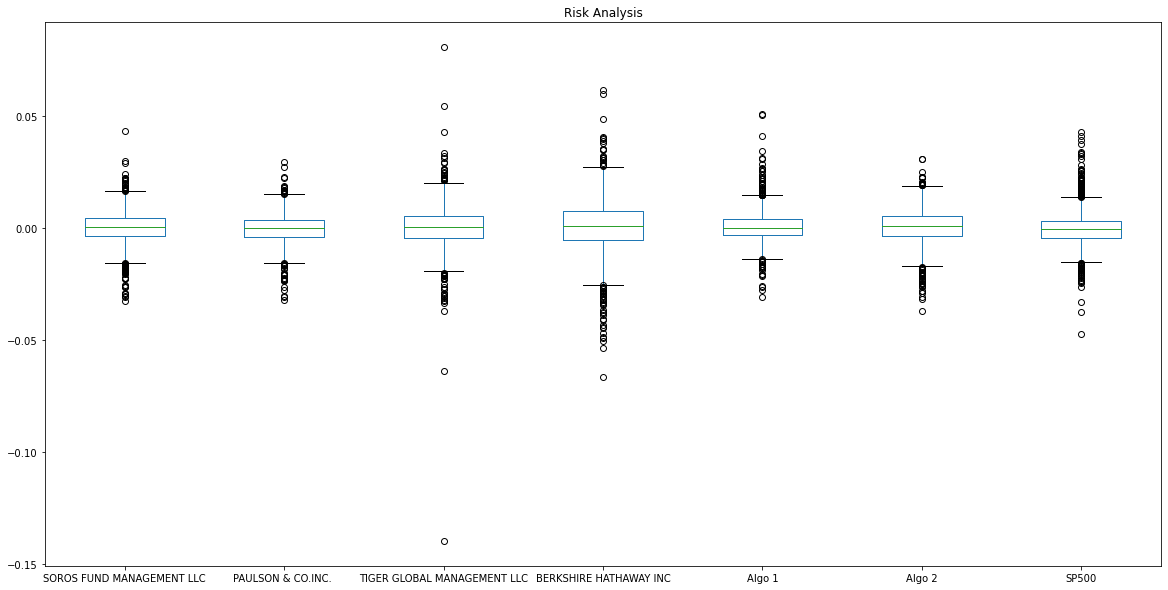

In [49]:
# Box plot risk viz
make_plot(combined_returns,"box", "Risk Analysis")

In [52]:
# Daily standard deviations
combined_returns.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008587
dtype: float64

In [55]:
# specify sp500 risk and show which portfolios have greater risk
sp500_risk = combined_returns["SP500"].std()
combined_returns.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

In [56]:
# annualized standard dev for 252 trading days
ann_std = combined_returns.std() * np.sqrt(252)
ann_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.136313
dtype: float64

# Rolling Stats & correlation

In [ ]:
# 21 day rolling st dev

In [ ]:
# 21 day rolling st dev ewm

In [58]:
# stock correlation, determine which mimic SP500

In [59]:
# 60 day rolling beta btwn one portfolio & SP500

# Sharpe Ratios
    1. Calculate Annualized Sharpe Ratios & visualize as bar plot

In [ ]:
# annualized sharpe ratios 
# mean * 252 days, stdev * sqrt(252)

In [61]:
# sharpe bar plot

# Custom Portfolio